In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read data set
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.sex

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [7]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [10]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
len(X), len(X_train) , len(X_test)

(1338, 1070, 268)

In [18]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


34/34 [==============================] - 1s 3ms/step - loss: 8612.8232 - mae: 8612.8232
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.2441 - mae: 7875.2441
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.0596 - mae: 7576.0596
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7657.7949 - mae: 7657.7949
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 7727.9189 - mae: 7727.9189
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7596.0396 - mae: 7596.0396
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7596.2114 - mae: 7596.2114
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7800.4419 - mae: 7800.4419
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7615.3389 - mae: 7615.3389
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.6836 - mae: 7674.68

In [19]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7253.9453 - mae: 7253.9453


[7253.9453125, 7253.9453125]

In [21]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Se agregan mas capas para mejorar el modelo

In [24]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13310.2100 - mae: 13310.2100
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13145.1084 - mae: 13145.1084
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12807.7324 - mae: 12807.7324
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12138.7559 - mae: 12138.7559
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11009.5977 - mae: 11009.5977
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9555.9316 - mae: 9555.9316
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8211.4844 - mae: 8211.4844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7552.0605 - mae: 7552.0605
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7439.1416 - mae: 7439.1416
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7417.1382 - mae:

In [26]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4787.5522 - mae: 4787.5522


[4787.55224609375, 4787.55224609375]

In [29]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13290.6797 - mae: 13290.6797
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13118.1416 - mae: 13118.1416
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12761.3086 - mae: 12761.3086
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12071.3281 - mae: 12071.3281
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10942.3848 - mae: 10942.3848
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9526.7998 - mae: 9526.7998
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8220.1260 - mae: 8220.1260
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7566.2061 - mae: 7566.2061
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7449.1475 - mae: 7449.1475
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7427.8062 - mae:

In [28]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3485.9287 - mae: 3485.9287


[3485.9287109375, 3485.9287109375]

<Axes: >

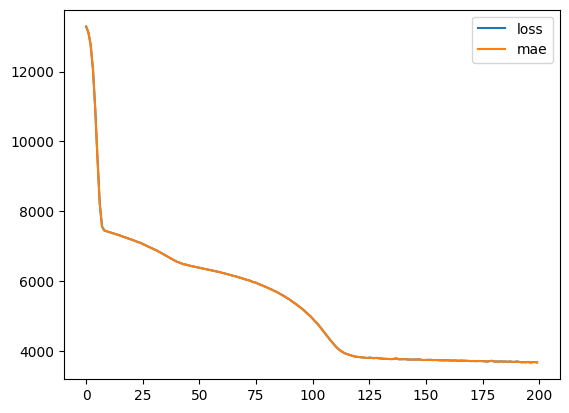

In [30]:
pd.DataFrame(history.history).plot()

<Axes: ylabel='Frequency'>

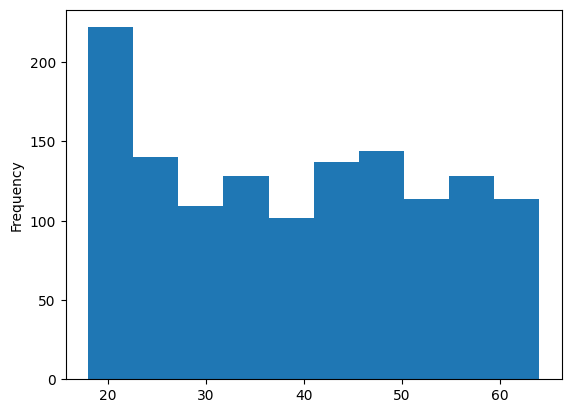

In [33]:
X['age'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

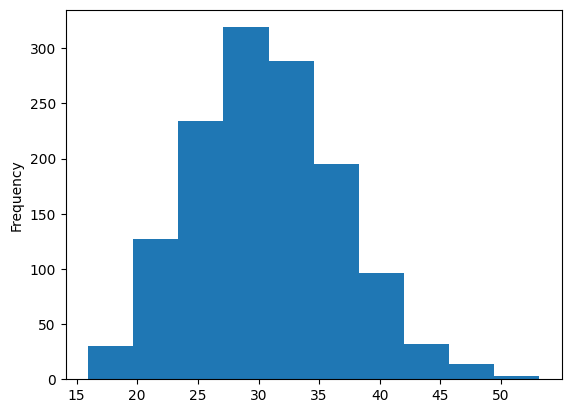

In [34]:
X['bmi'].plot(kind = 'hist')

In [35]:
X['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64